In [127]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')

d:\Anaconda\envs\ML_331\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [135]:
x = mnist.data.values
x = x / 255
x = x[0:10000,:]
x.shape

(10000, 784)

In [136]:
y = mnist.target.values
y

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [137]:
y_new = []
for i in range(0,y.shape[0]):
    y_new.append(int(y[i]))
y = np.array(y_new)
y

array([5, 0, 4, ..., 4, 5, 6])

In [138]:
def Prob(x,mu,k):
    p = 1
    for i in range(0,x.shape[0]):
        p *= k*(mu[i] ** x[i])*(1- mu[i])**(1-x[i])
    return p

In [139]:
def E(p,pi,k):
    gamma = np.zeros((x.shape[0],pi.shape[0]))
    for i in range(0,x.shape[0]):
        for j in range(0,pi.shape[0]):
            gamma[i][j] = pi[j] * Prob(x[i], p[j],k)
        gamma[i] /= np.sum(gamma[i])

    return gamma

In [140]:
def M(gamma):
    pi = np.sum(gamma,axis=0)/x.shape[0]

    p = x.T @ gamma
    p = p.T

    n = p.T / (pi*x.shape[0])
    p = n.T
    
    return p, pi

In [159]:
p = np.random.rand(10,784)
pi = np.random.rand(10)
factor = 1/np.sum(pi)
pi = pi * factor
np.sum(pi)
p.shape

(10, 784)

In [160]:
k = 2
for i in range(0,10):
    gamma = E(p,pi,k)
    p, pi  = M(gamma)

In [161]:
pi

array([0.0025989 , 0.20747177, 0.0604558 , 0.08380506, 0.16049765,
       0.08555609, 0.14811649, 0.05036213, 0.1044364 , 0.09669971])

In [162]:
p

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

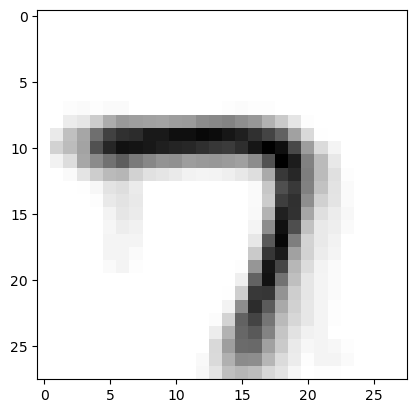

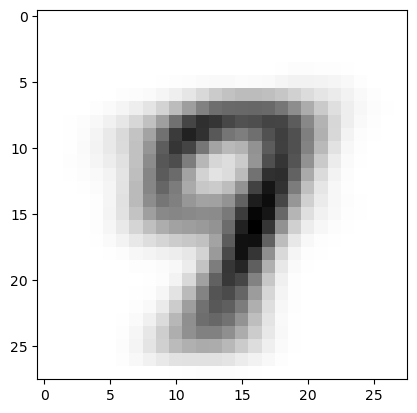

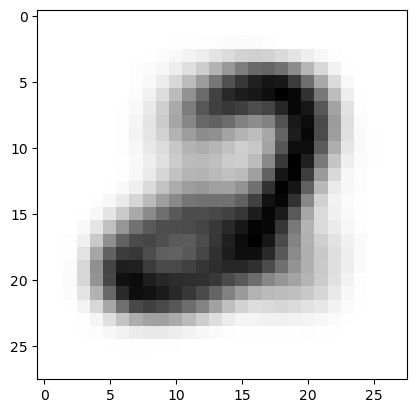

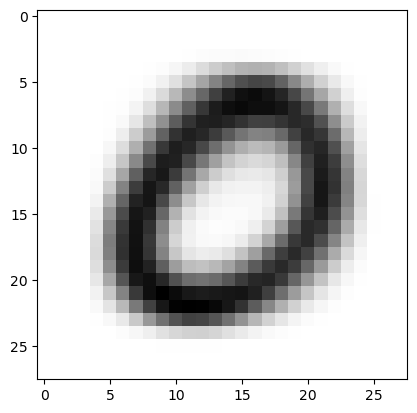

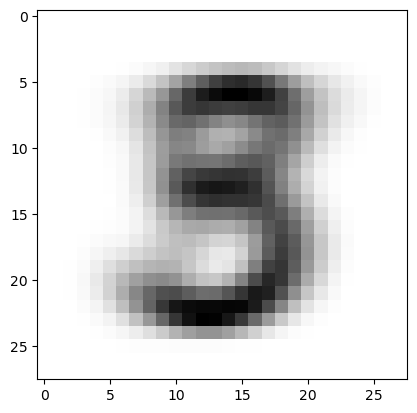

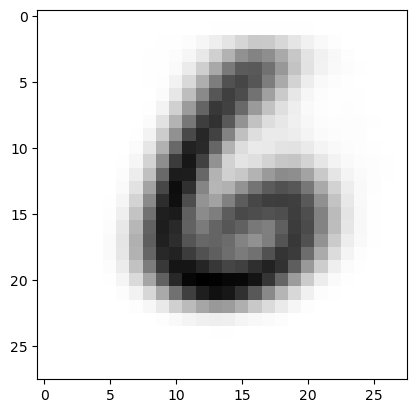

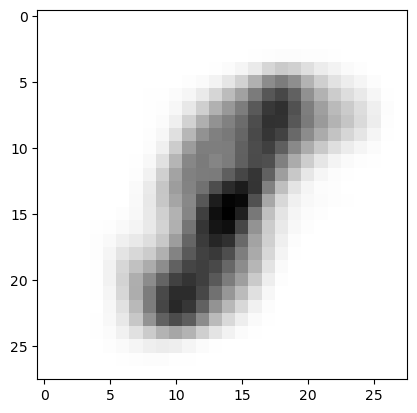

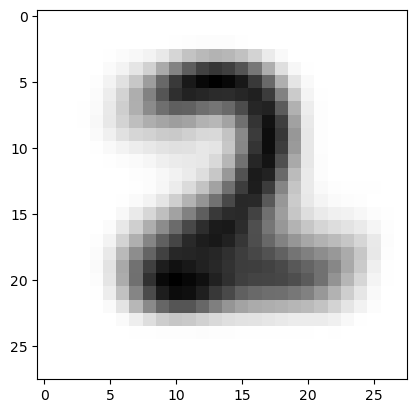

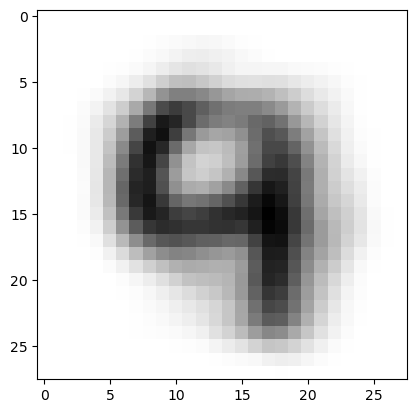

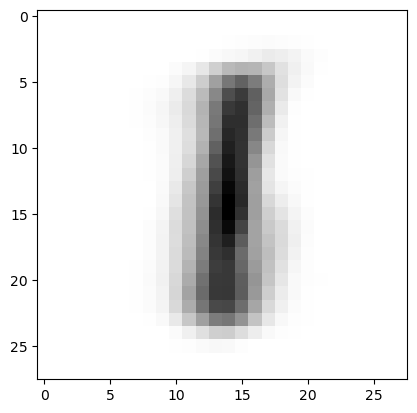

In [163]:
for mean in p:
    plt.imshow(mean.reshape(28,28), cmap = plt.cm.gray_r, interpolation='nearest')
    plt.show()